# Productor Consumidor, Dos consumidores y un Productor con Mutex

In [0]:
from threading import Thread, BoundedSemaphore, Lock
from queue import Queue
from random import randint

class Mutex:
    def __init__(self):
        self.lock = Lock()
    
    def bloquear(self):
        self.lock.acquire()
    
    def desbloquear(self):
        self.lock.release()

class Productor(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
        
    def producir(self):
        item = randint(0,101)
        print(f'Productor: Acabo de producir {item}')
        return item
    
    def añadir_al_buffer(self,item):
        self.buffer.put(item)
        print(f'Productor: Agregué {item} al buffer')
    
    def run(self):
      while True:
        if not self.buffer.full():
          self.mutex.bloquear()
          print(f'Productor: Hay espacio para nuevos items')
          item = self.producir()
          self.añadir_al_buffer(item)
          self.mutex.desbloquear()

class Consumidor1(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
    
    def quitar_del_buffer(self):
        item = self.buffer.get()
        print(f'Consumidor1: Obtuve {item} del buffer')
        return item
    
    def consumir(self,item):
        print(f'Consumidor1: Consumí {item}')
    
    def run(self):
      while True:
        if not self.buffer.empty():
          self.mutex.bloquear()
          print(f'Consumidor1: Hay items por consumir')
          item = self.quitar_del_buffer()
          self.consumir(item)
          self.mutex.desbloquear()

class Consumidor2(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
    
    def quitar_del_buffer(self):
        item1 = self.buffer.get()
        item2 = self.buffer.get()
        print(f'Consumidor2: Obtuve {item1} y {item2} del buffer')

    def consumir(self,item):
        print(f'Consumidor2: Consumí {item}')
    
    def run(self):
      while True:
        if not self.buffer.empty():
          self.mutex.bloquear()
          print(f'Consumidor2: Hay items por consumir')
          item = self.quitar_del_buffer()
          self.consumir(item)
          self.mutex.desbloquear()

mutex = Mutex()
buffer = Queue(10) 

p = Productor(buffer,mutex)
c1 = Consumidor1(buffer,mutex)
c2 = Consumidor2(buffer,mutex)
p.start()
c1.start()
c2.start()
p.join()
c1.join()
c2.join()


Productor: Hay espacio para nuevos items
Productor: Acabo de producir 29
Productor: Agregué 29 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 4
Productor: Agregué 4 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 92
Productor: Agregué 92 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 91
Productor: Agregué 91 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 76
Productor: Agregué 76 al buffer
Consumidor2: Hay items por consumir
Consumidor2: Obtuve 29 y 4 del buffer
Consumidor2: Consumí None
Consumidor2: Hay items por consumir
Consumidor2: Obtuve 92 y 91 del buffer
Consumidor2: Consumí None
Consumidor2: Hay items por consumir


KeyboardInterrupt: ignored

# Composicion de Funciones

In [0]:
import threading
from threading import Thread, RLock
from queue import Queue
from random import randint
import math
import matplotlib.pyplot as mp

class Mutex:
    def __init__(self):
        self.esta_bloqueado = False
        self.RLock = RLock()
    
    def bloquear(self):
        self.RLock.acquire()
        
    def desbloquear(self):
        self.RLock.release()

class funcionG(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.y = Queue(801)#dominio G

    def run(self):

      x = -100 
      while x <= 100:
        x += 0.25
        self.y.put(x)
        domG.append(x)
      for i in range(801):
        self.mutex.bloquear()
        j = self.y.get()
        z = 3 * j ** 2 + 2 * j - 1
        self.buffer.put(z)
        codG.append(z)
        print(f'Añadí {z} al codominio de G')
        #print(i)
        self.mutex.desbloquear()
      return self.buffer

class funcionF(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.k = Queue(801)#codominio de F

    def run(self):
        while True:
            if not self.buffer.empty():
              self.mutex.bloquear()
              z = self.buffer.get()
              print(f'Obtuve {z} del dominio de F')
              j = math.sin(z) + math.cos(z)
              self.k.put(j)
              codF.append(j)
              self.mutex.desbloquear()
            if self.k.full():
              print('Ya terminamos')
              break
        print(self.k)

mutex = Mutex()
buffer = Queue(801)#Codominio de G y dominio de F
domG = []
codG = []
codF = []
g = funcionG(buffer,mutex)
f = funcionF(buffer,mutex)

g.start()
f.start()
g.join()
f.join()

Añadí 29649.6875 al codominio de G
Añadí 29500.75 al codominio de G
Añadí 29352.1875 al codominio de G
Añadí 29204.0 al codominio de G
Añadí 29056.1875 al codominio de G
Añadí 28908.75 al codominio de G
Añadí 28761.6875 al codominio de G
Añadí 28615.0 al codominio de G
Añadí 28468.6875 al codominio de G
Añadí 28322.75 al codominio de G
Añadí 28177.1875 al codominio de G
Añadí 28032.0 al codominio de G
Añadí 27887.1875 al codominio de G
Añadí 27742.75 al codominio de G
Añadí 27598.6875 al codominio de G
Añadí 27455.0 al codominio de G
Añadí 27311.6875 al codominio de G
Añadí 27168.75 al codominio de G
Obtuve 29649.6875 del dominio de FAñadí 27026.1875 al codominio de G

Obtuve 29500.75 del dominio de F
Obtuve 29352.1875 del dominio de F
Obtuve 29204.0 del dominio de F
Obtuve 29056.1875 del dominio de F
Obtuve 28908.75 del dominio de F
Obtuve 28761.6875 del dominio de F
Obtuve 28615.0 del dominio de F
Obtuve 28468.6875 del dominio de F
Obtuve 28322.75 del dominio de F
Obtuve 28177.1875 d

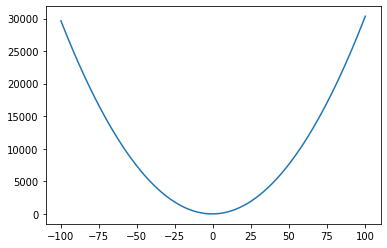

In [0]:
mp.plot(domG, codG)

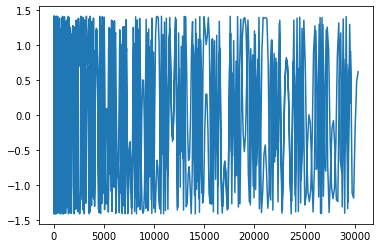

In [0]:
mp.plot(codG,codF)

# Fabricaciòn de Chicles

In [3]:
import threading
from threading import Thread, RLock
from queue import Queue
from random import randint
import math
import time   

class Mutex:
    def __init__(self):
        self.esta_bloqueado = False
        self.RLock = RLock()
    
    def bloquear(self):
        self.RLock.acquire()
        
    def desbloquear(self):
        self.RLock.release()

class Chicles(Thread):
    def __init__(self,mutex):
        super().__init__()
        self.mutex = mutex

    def run(self):
      while True:
        self.mutex.bloquear()
        global cajaCh
        cajaCh.put(1)  
        time.sleep(0.5)
        print(f'Chicle nuevo, tenemos {cajaCh.qsize()} en total') 
        self.mutex.desbloquear()

class Polvo(Thread):
    def __init__(self,mutex):
        super().__init__()
        self.mutex = mutex

    def run(self):
      while True:
        self.mutex.bloquear()
        global cajaP
        cajaP.put(2)
        time.sleep(0.3)
        print(f'Polvo nuevo, tenemos {cajaP.qsize()} en total')  
        self.mutex.desbloquear()
        

class Bolichicle(Thread):
    def __init__(self,mutexCh,mutexP):
        super().__init__()
        self.mutexCh = mutexCh
        self.mutexP = mutexP

    def run(self):
      while True:
        self.mutexCh.bloquear()
        self.mutexP.bloquear()
        
        global cajaP
        global cajaCh
        if (cajaP.qsize() !=0 and cajaCh.qsize()!= 0):
          cajaP.get()
          cajaCh.get()
          cajaB.put(1)
          print(f'Bolichicle nuevo, tenemos {cajaB.qsize()} en total') 
          time.sleep(2)
        self.mutexCh.desbloquear()
        self.mutexP.desbloquear()
        
class Bolsa(Thread):
    def __init__(self,mutex):
        super().__init__()
        self.mutex = mutex

    def run(self):
      while True:
        self.mutex.bloquear()
        global cajaB
        global cajaBolsa
        if(cajaB.qsize() == 10):
            for i in range(10):
                cajaB.get()
            cajaBolsa.put(1)
            print(f'Bolsa nueva, tenemos {cajaBolsa.qsize()} en total')  
        self.mutex.desbloquear()
        
mutexCh = Mutex()
mutexP = Mutex()
mutexB = Mutex()

cajaCh = Queue(200)
cajaP = Queue(200)
cajaB = Queue(200)
cajaBolsa = Queue()

chicle = Chicles(mutexCh)
polvo = Polvo(mutexP)
bolichicle = Bolichicle(mutexCh,mutexP)
bolsa = Bolsa(mutexB)

chicle.start()
polvo.start()
bolichicle.start()
bolsa.start()

chicle.join()
polvo.join()
bolichicle.join()
bolsa.join()

Polvo nuevo, tenemos 1 en total
Chicle nuevo, tenemos 1 en total
Polvo nuevo, tenemos 2 en total
Polvo nuevo, tenemos 3 en total
Chicle nuevo, tenemos 2 en total
Polvo nuevo, tenemos 4 en total
Chicle nuevo, tenemos 3 en total
Polvo nuevo, tenemos 5 en total
Polvo nuevo, tenemos 6 en total
Chicle nuevo, tenemos 4 en total
Polvo nuevo, tenemos 7 en total
Polvo nuevo, tenemos 8 en total
Chicle nuevo, tenemos 5 en total
Polvo nuevo, tenemos 9 en total
Chicle nuevo, tenemos 6 en total
Polvo nuevo, tenemos 10 en total
Polvo nuevo, tenemos 11 en total
Chicle nuevo, tenemos 7 en total
Polvo nuevo, tenemos 12 en total
Polvo nuevo, tenemos 13 en total
Chicle nuevo, tenemos 8 en total
Polvo nuevo, tenemos 14 en total
Chicle nuevo, tenemos 9 en total
Polvo nuevo, tenemos 15 en total
Polvo nuevo, tenemos 16 en total
Chicle nuevo, tenemos 10 en total
Polvo nuevo, tenemos 17 en total
Chicle nuevo, tenemos 11 en totalPolvo nuevo, tenemos 18 en total

Polvo nuevo, tenemos 19 en total
Chicle nuevo, ten

KeyboardInterrupt: ignored

Chicle nuevo, tenemos 15 en total
